In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

import pingouin as pg

## Importing Data

### Loading 

In [47]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [48]:
df=pd.read_csv("../data/train.csv",index_col="Id",dtype={'MSSubClass':'category',
                    'OverallQual': 'category','OverallCond':'category','YearBuilt':'category',
                    'YearRemodAdd':'category','YrSold':'category','MoSold':'category','GarageYrBlt':'category'})

In [49]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [51]:
df.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
df[df.select_dtypes(include="object").columns]=df[df.select_dtypes(include="object").columns].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [54]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [55]:
df.describe(include="category")

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


In [56]:
df.duplicated().sum()

0

### Categorical variables

<AxesSubplot:>

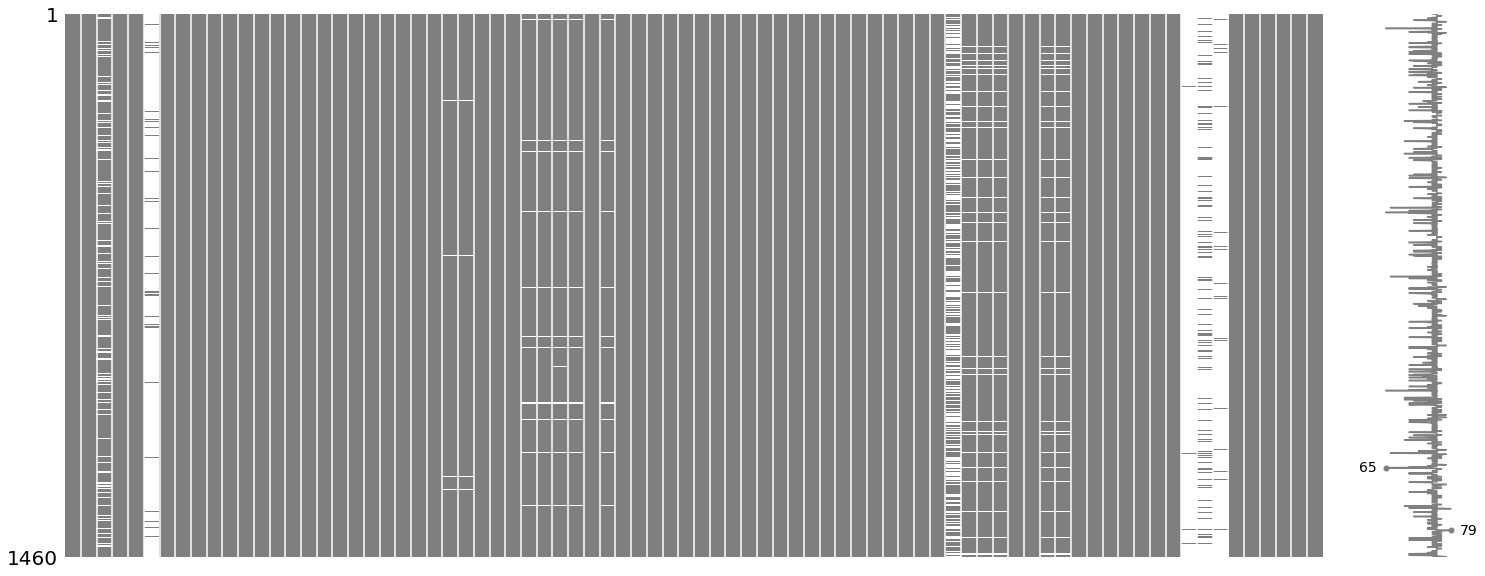

In [57]:
msno.matrix(df,color=(0.5,0.5,0.5))

In [58]:
df.isna().sum()[df.isna().any()]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [59]:
warnings.filterwarnings('ignore') # Turn off warnings
labels={'Alley':'No alley access',
        'BsmtQual':'No Basement',
        'BsmtCond':'No Basement',
        'BsmtExposure':'No Basement',
        'BsmtFinType1':'No Basement',
        'BsmtFinType2':'No Basement',
        'FireplaceQu':'No Fireplace',
        'GarageType':'No Garage',
        'GarageFinish':'No Garage',
        'GarageQual':'No Garage',
        'GarageCond':'No Garage','PoolQC':'No Pool',
        'Fence':'No Fence',
        'MiscFeature':'None',
        'GarageYrBlt':'No Garage'}

for variable,label in labels.items():
    # Set a new category to the variable
    df[variable].cat.add_categories(label,inplace=True)
    
    #Replace all the NA's by the new category
    df[variable].where(df[variable].notna(),other=label,inplace=True)

<AxesSubplot:>

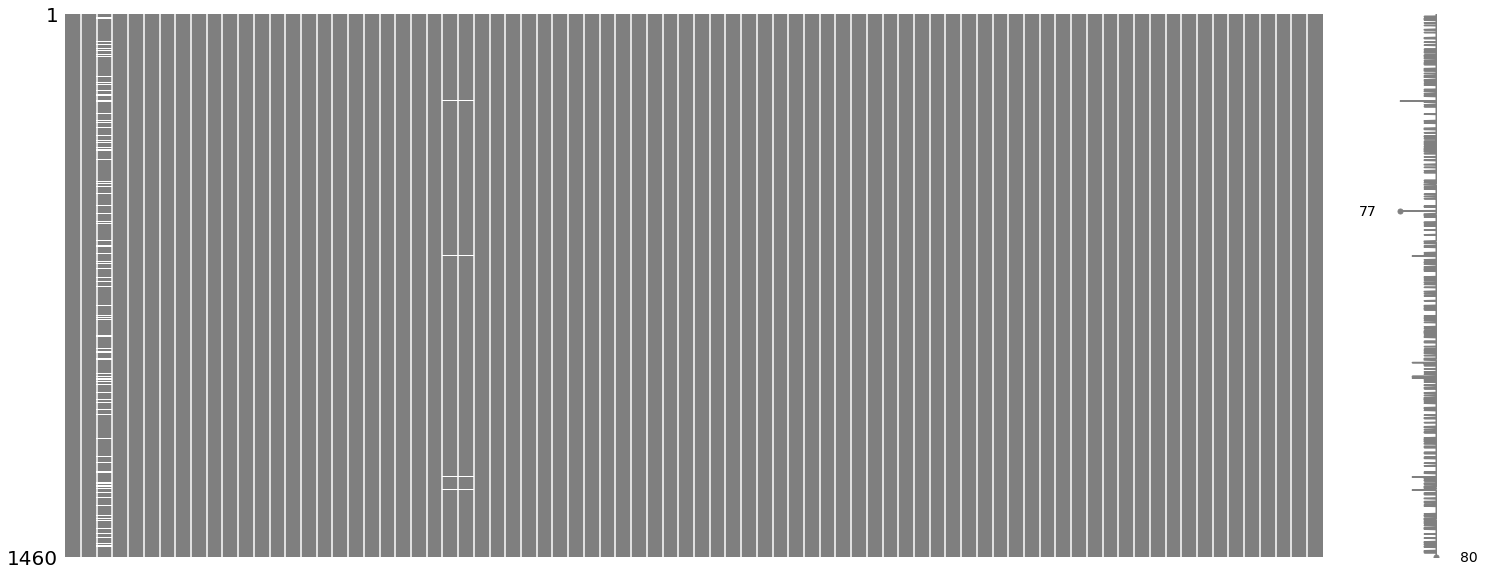

In [60]:
msno.matrix(df,color=(0.5,0.5,0.5))

In [61]:
df.isna().sum()[df.isna().any()]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [62]:
labels={'LandContour':['Lvl','Bnk','HLS','Low'],
        'Utilities':['ELO','NoSeWa','NoSeWr','AllPub'],
        'LandSlope':['Gtl','Mod','Sev'],
        'LotShape':['Reg','IR1','IR2','IR3'],
        'HouseStyle':['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],
        'OverallQual':['1','2','3','4','5','6','7','8','9','10'],'OverallCond':['1','2','3','4','5','6','7','8','9','10'],
        'ExterQual':['Po','Fa','TA','Gd','Ex'],
        'ExterCond':['Po','Fa','TA','Gd','Ex'],
        'BsmtQual':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtCond':['No Basement','Po','Fa','TA','Gd','Ex'],
        'BsmtExposure':['No Basement','No','Mn','Av','Gd'],
        'BsmtFinType1':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'BsmtFinType2':['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
        'HeatingQC':['Po','Fa','TA','Gd','Ex'],
        'KitchenQual':['Po','Fa','TA','Gd','Ex'],
        'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
        'FireplaceQu':['No Fireplace','Po','Fa','TA','Gd','Ex'],
        'GarageQual':['No Garage','Po','Fa','TA','Gd','Ex'],
        'GarageFinish':['No Garage','Unf','RFn','Fin'],
        'GarageCond':['No Garage','Po','Fa','TA','Gd','Ex'],
        'PavedDrive':['N','P','Y'],
        'PoolQC':['No Pool','Po','Fa','TA','Gd','Ex'],
        'Fence':['No Fence','MnWw','GdWo','MnPrv','GdPrv']
       }

for var_name,label in labels.items():
    for value in label:
        if value not in df[var_name].cat.categories:
            df[var_name].cat.add_categories(value,inplace=True)
        
    df[var_name].cat.reorder_categories(label,inplace=True)
    df[var_name].cat.as_ordered(inplace=True)

In [63]:
df.describe(include='category')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,6,6,3,4,5,5,12,5,9,6
top,20,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,No Pool,No Fence,None,6,2009,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,1311,1326,1340,1453,1179,1406,253,338,1267,1198


In [64]:
df[['MasVnrType','MasVnrArea']].groupby('MasVnrType').describe()

MasVnrArea                                                      \
                count        mean         std   min    25%    50%     75%   
MasVnrType                                                                  
BrkCmn           15.0  247.666667  182.423239  41.0   91.5  192.0  381.50   
BrkFace         445.0  259.008989  215.137888   0.0  114.0  202.0  336.00   
None            864.0    1.094907   18.569659   0.0    0.0    0.0    0.00   
Stone           128.0  239.304688  172.129257   0.0  111.5  206.5  296.25   

                    
               max  
MasVnrType          
BrkCmn       621.0  
BrkFace     1600.0  
None         344.0  
Stone        860.0

In [65]:
df[['BsmtFinType1','BsmtFinSF1']].groupby('BsmtFinType1',dropna=False).describe()

BsmtFinSF1                                                \
                  count        mean         std    min     25%    50%   
BsmtFinType1                                                            
No Basement        37.0    0.000000    0.000000    0.0    0.00    0.0   
Unf               430.0    0.000000    0.000000    0.0    0.00    0.0   
LwQ                74.0  379.540541  269.696236   16.0  187.00  318.0   
Rec               133.0  516.601504  272.460866  129.0  312.00  456.0   
BLQ               148.0  536.668919  270.945193   25.0  349.50  516.5   
ALQ               220.0  619.863636  320.433310   20.0  383.25  593.5   
GLQ               418.0  801.729665  490.888087    2.0  517.00  739.5   

                               
                  75%     max  
BsmtFinType1                   
No Basement      0.00     0.0  
Unf              0.00     0.0  
LwQ            503.00  1237.0  
Rec            637.00  1332.0  
BLQ            675.00  1277.0  
ALQ            788.25  1880.0  
GLQ           1081.25  5644.0

In [66]:
df[['BsmtFinType2','BsmtFinSF2']].groupby('BsmtFinType2',dropna=False).describe()

BsmtFinSF2                                                      \
                  count        mean         std   min    25%    50%     75%   
BsmtFinType2                                                                  
No Basement        38.0   12.605263   77.704061   0.0    0.0    0.0    0.00   
Unf              1256.0    0.000000    0.000000   0.0    0.0    0.0    0.00   
LwQ                46.0  310.739130  200.198394  35.0  169.5  277.5  437.25   
Rec                54.0  392.462963  274.344276  64.0  180.0  320.0  498.75   
BLQ                33.0  329.909091  240.181229  28.0  147.0  294.0  441.00   
ALQ                19.0  626.157895  328.279736  64.0  539.0  606.0  702.00   
GLQ                14.0  658.000000  335.447806  41.0  507.0  623.0  939.25   

                      
                 max  
BsmtFinType2          
No Basement    479.0  
Unf              0.0  
LwQ           1061.0  
Rec           1085.0  
BLQ           1120.0  
ALQ           1474.0  
GLQ           1127.0

In [67]:
(df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].sum(axis=1)==df['TotalBsmtSF']).value_counts()

True    1460
dtype: int64

## EDA: Exploratory Data Analysis

### Summary

In [68]:
df['SalePrice'].describe().astype(int)

count      1460
mean     180921
std       79442
min       34900
25%      129975
50%      163000
75%      214000
max      755000
Name: SalePrice, dtype: int32

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

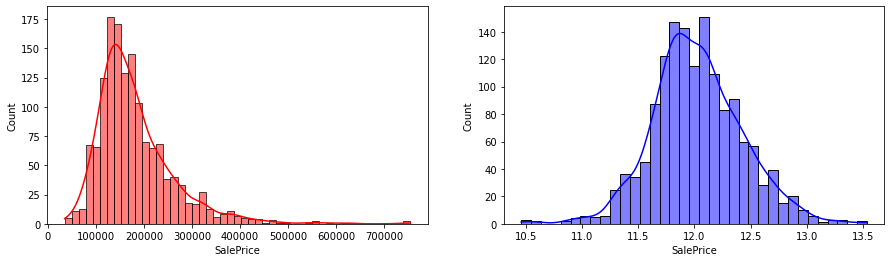

In [69]:
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,4))
sns.histplot(df,x='SalePrice',color='red',kde=True,ax=axes[0])

sns.histplot(np.log(df['SalePrice']),color='blue',kde=True,ax=axes[1])

In [70]:
# ?sns.histplot

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

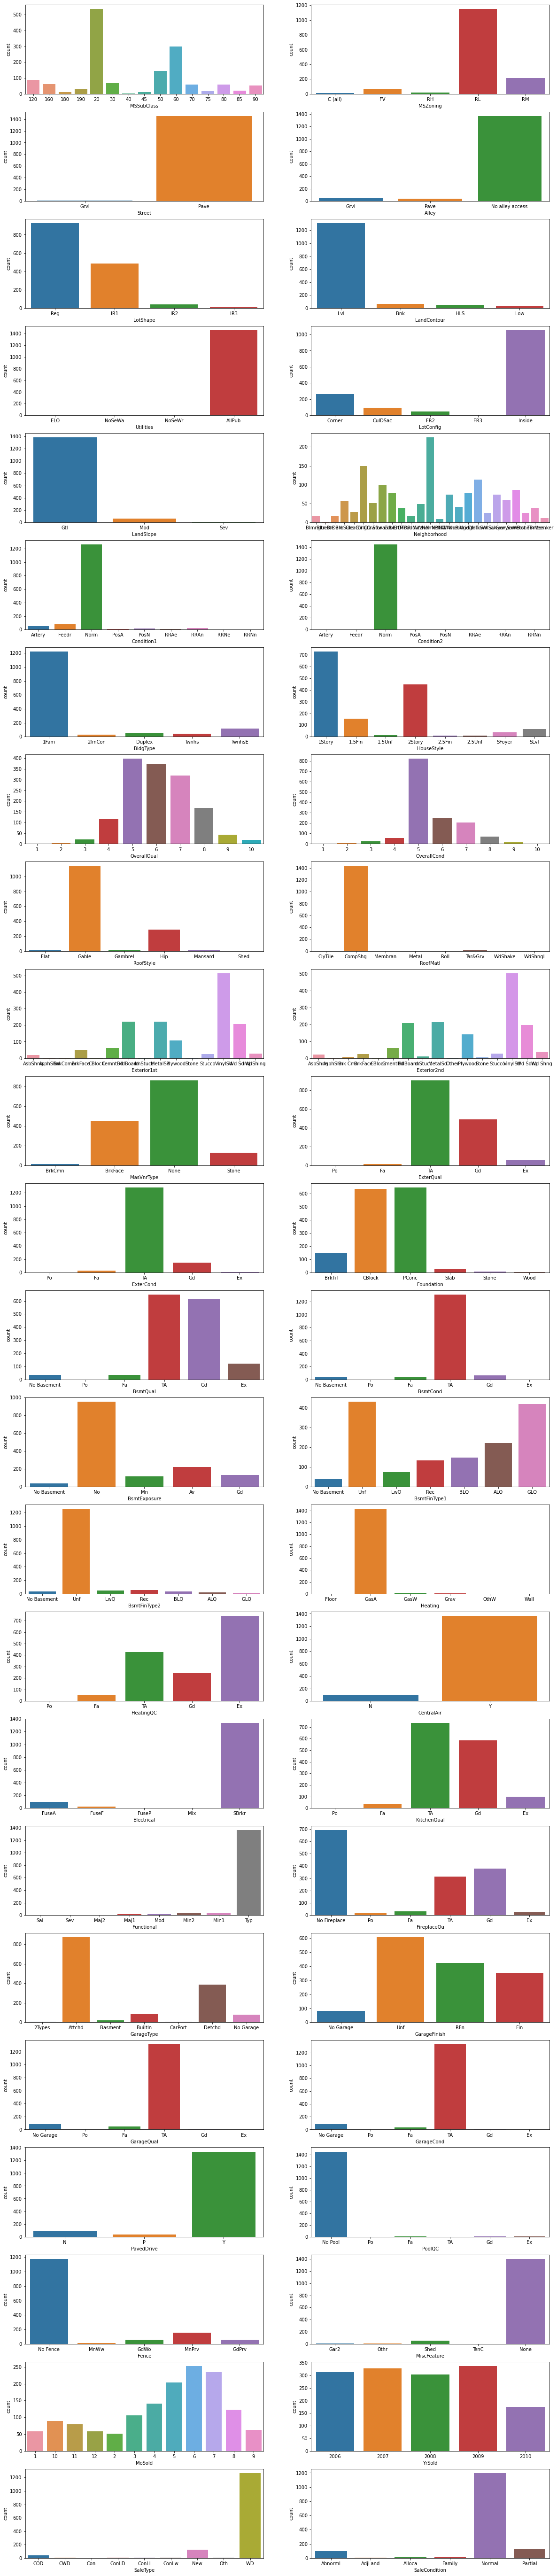

In [71]:
ncols=2
categorial_features=df.select_dtypes('category').columns
categorial_features=categorial_features.delete(categorial_features.get_indexer(['YearBuilt','YearRemodAdd','GarageYrBlt']))
nrows=len(categorial_features)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,100))
axes=axes.ravel()

for i, col_name in enumerate(categorial_features):
        ax=axes[i]
        sns.countplot(data=df,x=col_name,ax=ax)

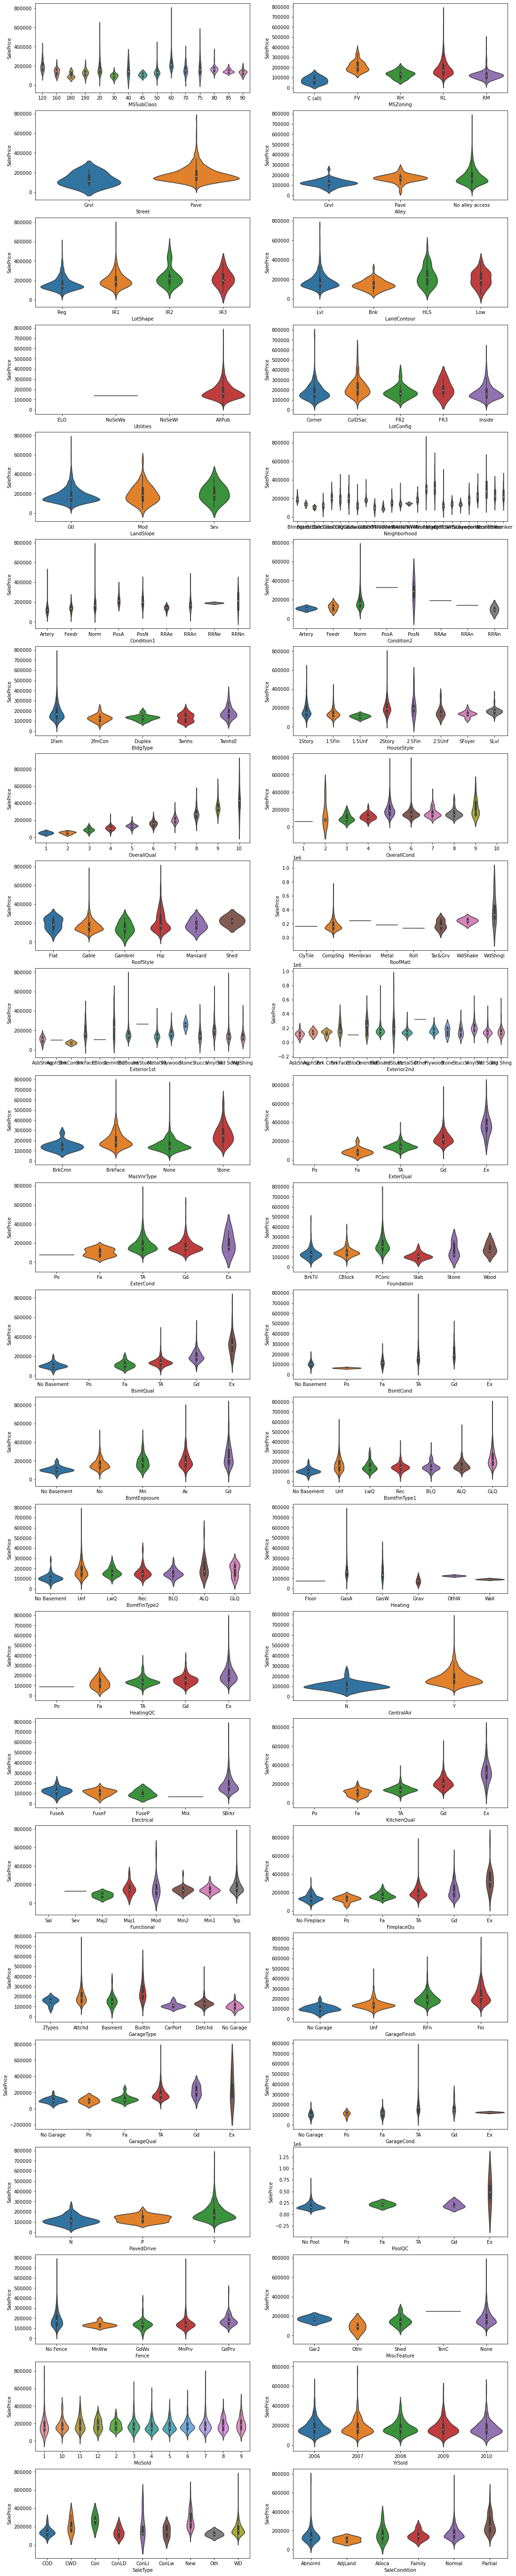

In [72]:
fig, axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,100))
axes=axes.ravel()

for i, col_name in enumerate(categorial_features):
    ax=axes[i]
    sns.violinplot(x=col_name,y='SalePrice',data=df,ax=ax)

### Analysis of variance

In [82]:
tuple(categorial_features)

('MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition')

In [89]:
object

Init signature: str(self, /, *args, **kwargs)
Docstring:     
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
Type:           type
Subclasses:     DeferredConfigString, _rstr, LSString, include, ColorDepth, Keys, InputMode, CompleteStyle, SortKey, FoldedCase, ...


In [113]:
pg.homoscedasticity(data=df,dv='SalePrice',group=categorial_features)

AttributeError: 'Index' object has no attribute 'hash'

In [37]:
tab=pd.DataFrame()
for col_name in list(categorial_features):
    tab=pd.concat([tab,pg.anova(data=df,dv='SalePrice',between=col_name)],ignore_index=True)
tab

,Source,ddof1,ddof2,F,p-unc,np2
0,MSSubClass,14,1445,33.732076,8.662166e-79,0.246316
1,MSZoning,4,1455,43.840282,8.817634e-35,0.107560
2,Street,1,1458,2.459290,1.170486e-01,0.001684
3,Alley,2,1457,15.176614,2.996380e-07,0.020408
4,LotShape,3,1456,40.132852,6.447524e-25,0.076376
5,LandContour,3,1456,12.850188,2.742217e-08,0.025794
6,Utilities,1,1458,0.298804,5.847168e-01,0.000205
7,LotConfig,4,1455,7.809954,3.163167e-06,0.021019
8,LandSlope,2,1457,1.958817,1.413964e-01,0.002682
9,Neighborhood,24,1435,71.784865,1.558600e-225,0.545575


In [42]:
pg.pairwise_tests(data=df,dv='SalePrice',between='Alley')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Alley,No alley access,Grvl,False,True,11.381039,70.047846,two-sided,1.388415e-17,2.223e+25,0.769591
1,Alley,No alley access,Pave,False,True,2.423115,51.263992,two-sided,1.895745e-02,2.573,0.193584
2,Alley,Grvl,Pave,False,True,-5.905278,81.760353,two-sided,7.730382e-08,1.762e+05,-1.245809


In [ ]:
numerical_features=df.select_dtypes('number').columns
nrows=len(numerical_features[0:-1])//ncols

fig, axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,100))
axes=axes.ravel()
for i, col_name in enumerate(numerical_features):
    ax=axes[i]
    sns.histplot(data=df,x=col_name, kde=True,ax=axes[i])

In [ ]:
fig, axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,90))
axes=axes.ravel()

for i, col_name in enumerate(numerical_features[0:-1]):
    ax=axes[i]
    sns.scatterplot(x=col_name,y='SalePrice',data=df,ax=ax)

In [ ]:
sns.pairplot(df[0:-1],corner=True,diag_kind="kde")